<a href="https://colab.research.google.com/github/njeri-max/Neural_Nets/blob/main/foward_Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [6]:
data=pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data[data['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
data[data['Outcome']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
len(data[data['Outcome']==1]), len(data[data['Outcome']==0])

(268, 500)

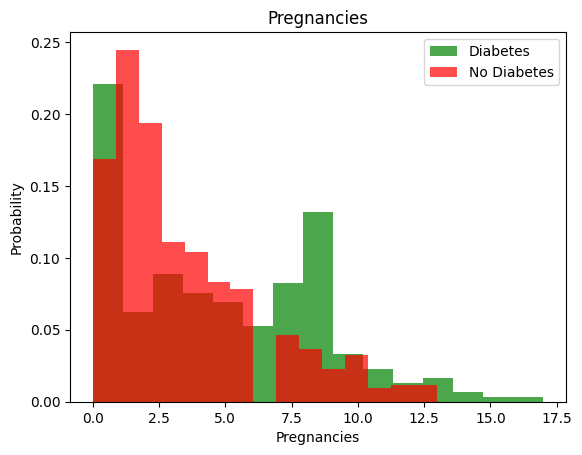

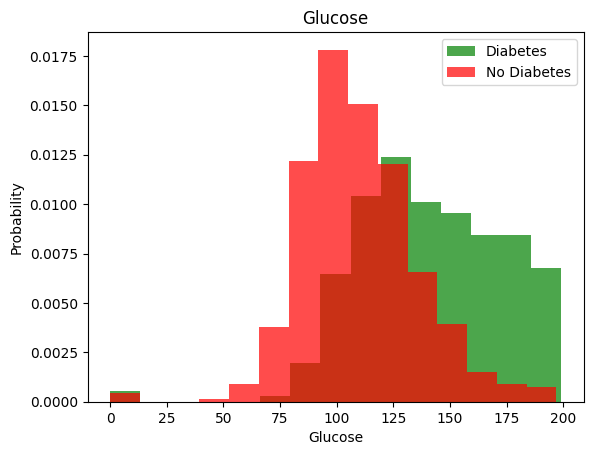

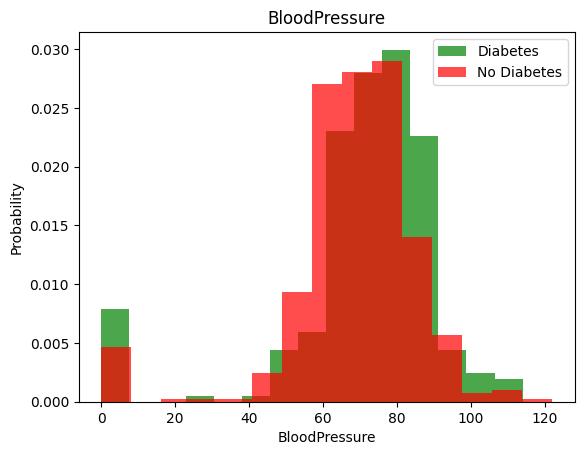

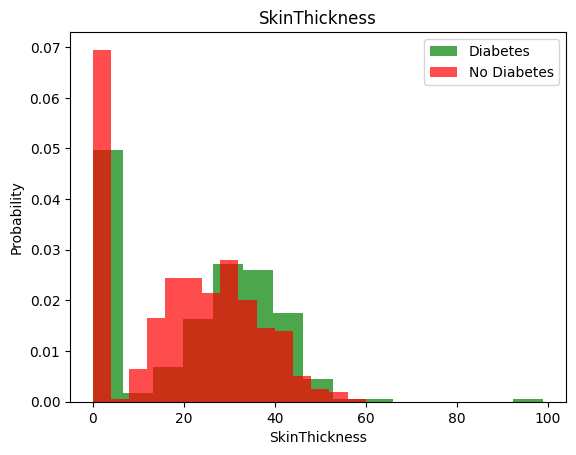

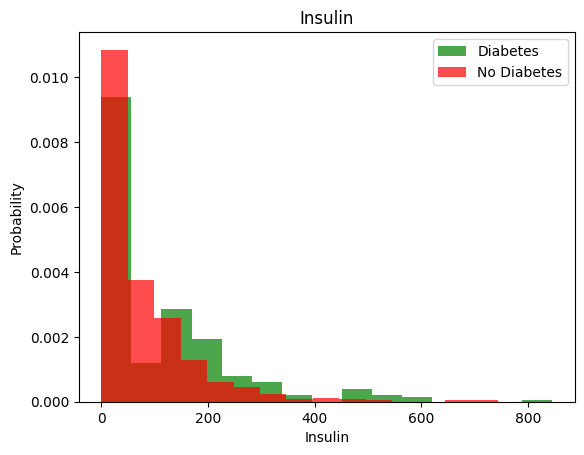

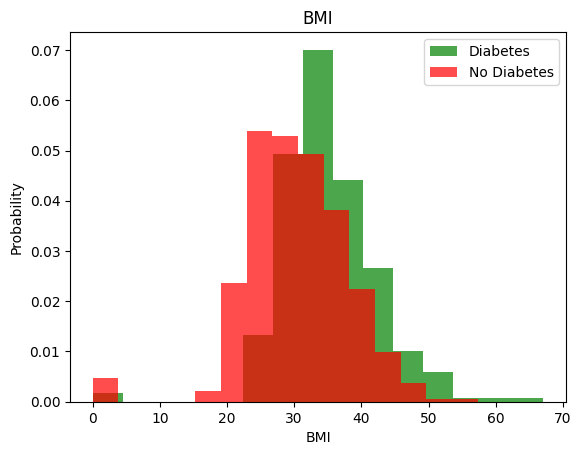

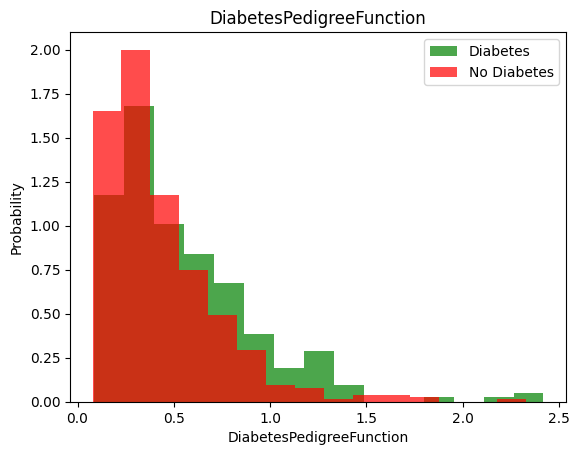

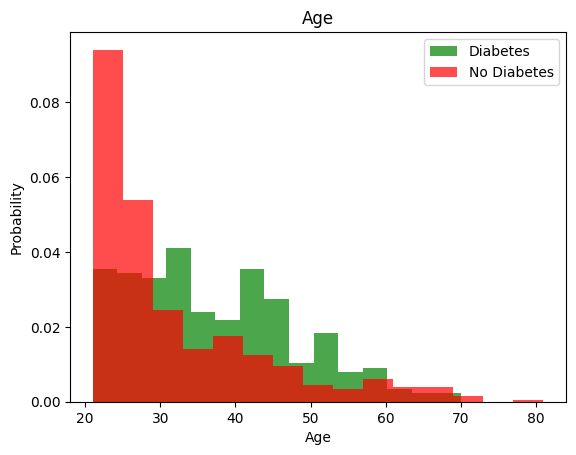

In [ ]:
#Normalizing
for i in range(len(data.columns[:-1])):
  label = data.columns[i]
  plt.hist(data[data['Outcome']==1][label], color='green', label='Diabetes',alpha=0.7, density=True, bins=15)
  plt.hist(data[data['Outcome']==0][label], color='red', label='No Diabetes',alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [7]:
X = data[data.columns[:-1]].values
y = data[data.columns[-1]].values

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
dataf=np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df=pd.DataFrame(dataf, columns=data.columns)

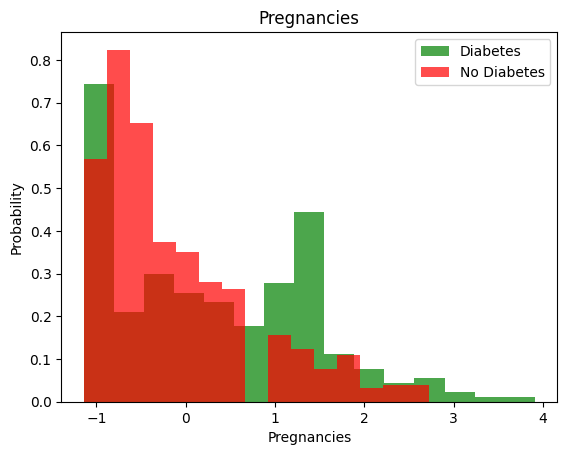

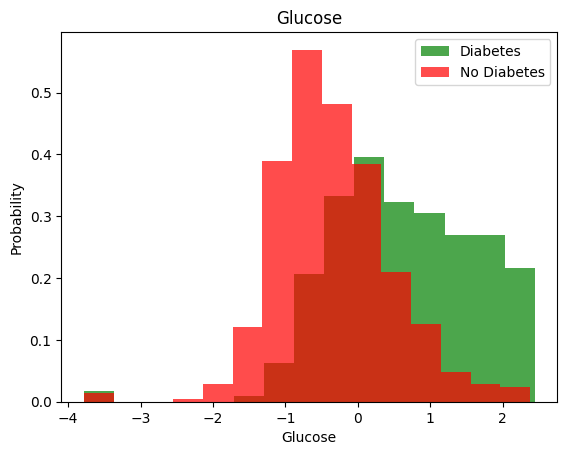

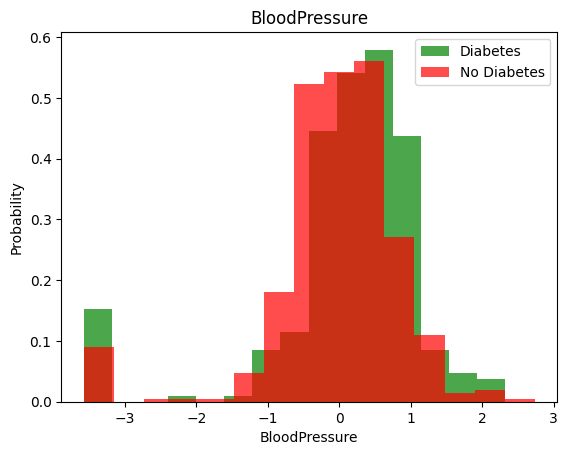

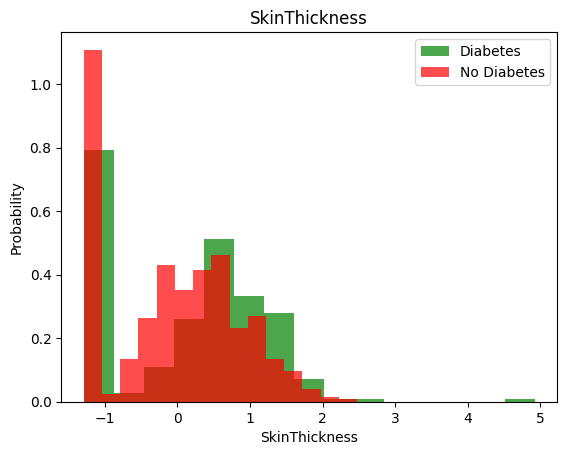

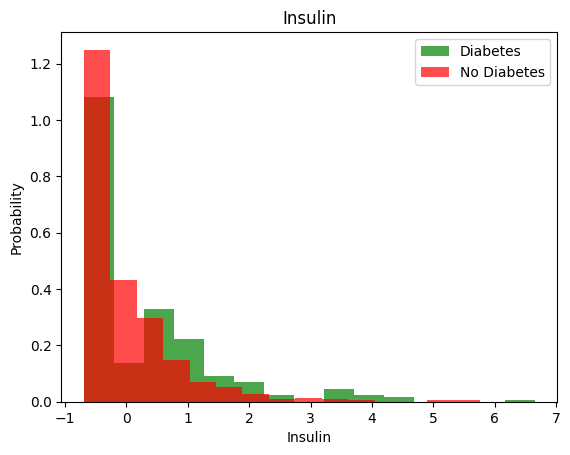

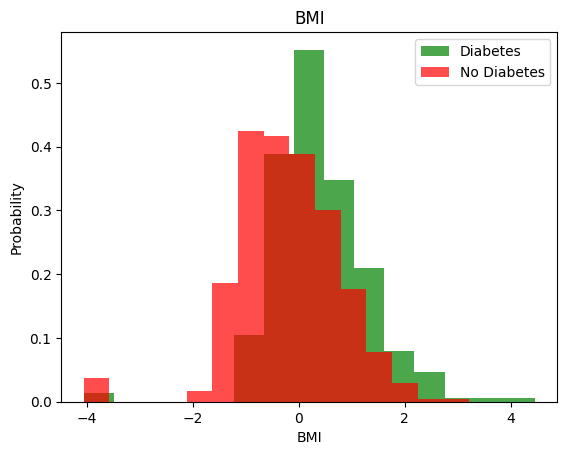

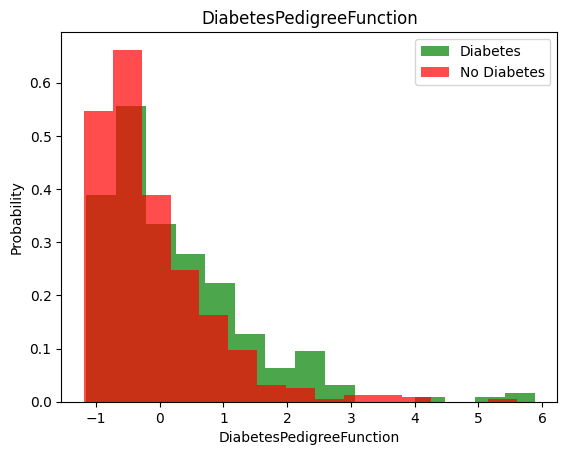

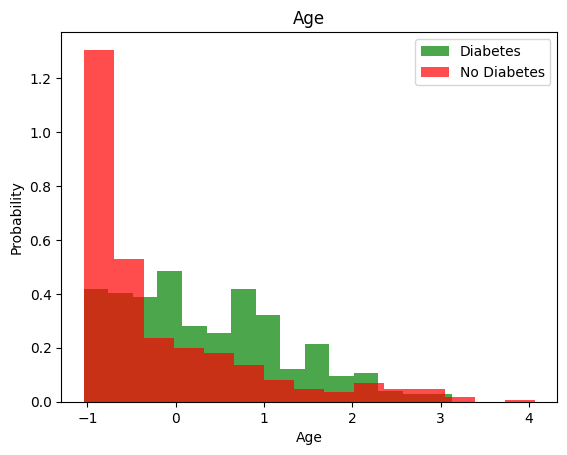

In [9]:
for i in range(len(data.columns[:-1])):
  label = data.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='green', label='Diabetes',alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red', label='No Diabetes',alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [11]:
#Balancing the dataset interms of the outcomes
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
dataf=np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df=pd.DataFrame(dataf, columns=data.columns)

In [12]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0]),

(500, 500)

In [13]:
#train= 40%
#test and validation sets=(100- 40) /2
#split X and y into training and test datasets
X_train, X_temp, y_train, y_temp =train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test =train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [14]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [16]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 1s 5ms/step - loss: 0.7181 - accuracy: 0.4900


[0.7181081771850586, 0.49000000953674316]

In [17]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 4ms/step - loss: 0.7362 - accuracy: 0.4400


[0.736196756362915, 0.4399999976158142]

In [18]:
model.fit(X_train, y_train, batch_size=20, epochs=25, validation_data=(X_valid, y_valid)) #epochs meausres the rotation

Epoch 1/25
30/30 [==============================] - 1s 5ms/step - loss: 0.6977 - accuracy: 0.5050 - val_loss: 0.6953 - val_accuracy: 0.4950
Epoch 2/25
30/30 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.6050 - val_loss: 0.6641 - val_accuracy: 0.6200
Epoch 3/25
30/30 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.7050 - val_loss: 0.6394 - val_accuracy: 0.6850
Epoch 4/25
30/30 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.7333 - val_loss: 0.6164 - val_accuracy: 0.7000
Epoch 5/25
30/30 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.7367 - val_loss: 0.5968 - val_accuracy: 0.7150
Epoch 6/25
30/30 [==============================] - 0s 4ms/step - loss: 0.5696 - accuracy: 0.7383 - val_loss: 0.5773 - val_accuracy: 0.7000
Epoch 7/25
30/30 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.7333 - val_loss: 0.5584 - val_accuracy: 0.7150
Epoch 8/25
30/30 [==

In [19]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4922 - accuracy: 0.7700


[0.49222445487976074, 0.7699999809265137]